In [1]:
# To install librosa - For reading the sound file. Also to find out the channel rate, sample rate for the audio 
!pip install librosa

# Also for reading the .wav file we use libraries from scipy. 

In [1]:
# To display the signals, will use matplotlib
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
filename = 'UrbanSound8K/dog_bark.wav'

In [4]:
# To display the graphs of audio file
import IPython.display as ipd

import librosa
import librosa.display

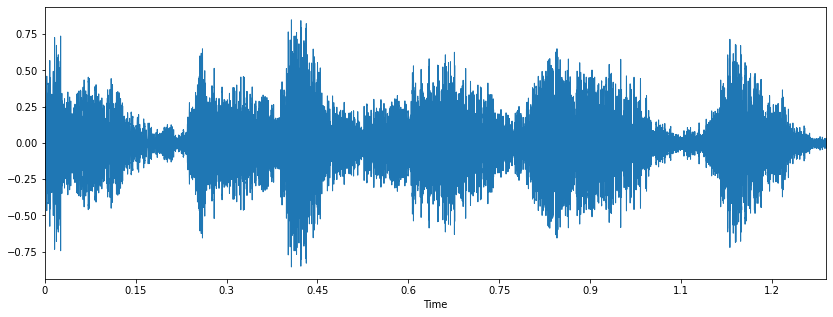

In [14]:
plt.figure(figsize=(14,5)) # To plot the figure of 14x5

# It gives 2 parameters - data and sample_rate by loading the file. 
librosa_audio_data, librosa_sample_rate = librosa.load(filename)
 
# To display in the waveplot by taking data and sample_rate got above
librosa.display.waveplot(librosa_audio_data, sr = librosa_sample_rate)
 
# Audio is the function which will help to load the input files in .wav files. 
ipd.Audio(filename)

In [15]:
librosa_sample_rate # It defines the how many times per second the sound is sampled. 
# When we read it with librosa, then we get the sample rate as 22050 Hz, but in general it is 44Khz. 

# There are 2 types of channel in an audio - One is called 'streo' and other is called 'Mono'
 # Streo means getting different amount of signals on 2 ears
 # Mono means getting equal amount of signals on 2 ears

# For Librosa, if we read the audio file, then it basically normalize the data and data is given with respect to single sample rate
# Librosa always convert it into 'Mono' Channel and  hence it is very helpful and benificial than using scipy

22050

In [16]:
# importing libraries by using scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(filename) # 2 Parameters - sample_rate and data using scipy

In [17]:
wave_sample_rate

# So using scipy, the actual sample rate is displayed and here they are not normailized 

44100

In [18]:
wave_audio # It gives the value in each point in the signal and when we combine the all the values then we get the wave  

array([[-8251, -4796],
       [-7005, -3985],
       [-6004, -2742],
       ...,
       [  586,     4],
       [  574,   -41],
       [  564,   -89]], dtype=int16)

In [19]:
librosa_audio_data # The data is getting normailize between -1 to +1 and hence librosa is preffered which is not the case in scipy where data is not getting normailise

array([-0.14130203, -0.15156107, -0.06821189, ...,  0.0116197 ,
        0.00967111,  0.        ], dtype=float32)

In [20]:
import pandas as pd

In [21]:
metadata = pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [22]:
# Check whether dataset is balanced or not 
metadata['class'].value_counts() # It is balanced datasets

air_conditioner     1000
engine_idling       1000
drilling            1000
dog_bark            1000
children_playing    1000
jackhammer          1000
street_music        1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

In [23]:
# We need to keep the datasets into independent and dependent features. 
 # Independent features should be features extracted from audio signals and dependent features should be the class labels


In [39]:
# Now to take the signals and will create some independent features. 
# Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio samples. The MFCC summarises the frequency
  # distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound.
  # These audio representations will allow us to identify features for classification.

mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc = 40)
print(mfccs.shape)

# n_mfcc is used for converting the data into dimensions, in this case 40*y (n_mfcc is 40)

(40, 56)


In [40]:
mfccs

array([[-6.0499168e+01, -5.5166477e+01, -7.7248558e+01, ...,
        -1.6767445e+02, -2.2657509e+02, -2.8203113e+02],
       [ 1.6583923e+02,  1.5250719e+02,  1.2260410e+02, ...,
         1.5803818e+02,  1.5860605e+02,  1.5616048e+02],
       [-1.9202702e+01, -2.9878788e+01, -3.4569359e+01, ...,
        -3.4652306e+01, -2.5588554e+01, -1.2899855e+01],
       ...,
       [-8.4162922e+00, -3.4628396e+00, -1.5117226e+00, ...,
         8.0743704e+00,  7.1085815e+00,  1.3729475e+00],
       [ 8.9795618e+00,  8.4237413e+00, -6.5453310e+00, ...,
         9.3157597e+00,  4.2822599e+00,  9.9749053e-01],
       [-1.6071230e-01, -7.2061286e+00, -1.2183823e+01, ...,
         1.0546174e+00,  7.5433826e+00,  3.6652908e-01]], dtype=float32)

In [41]:
#Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='UrbanSound8K/audio/'
metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [43]:
# Now to create feature extractor - For one audio file 
def features_extractor(file):
    # For 'kaiser_fast' - If you need to reduce load time, you can pass in an optional parameter to the load function,
      # 'res_type', short for resample type(default is 'kaiser_best'). Options are 'scipy' and 'kaiser_fast'.
    # For Eg : When using the default sample rate, the 'kaiser_fast' noticeably reduced the load time (~16 down to under 5),
     # but the 'scipy' actually added time (85 seconds!!). When passing in sample rate as 11000, the 'scipy' it took about 
     # 67 second and 'kaiser_best' still came in fastest at about 4.85 sec.
    
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') # We get the audio data and sample_rate when we load the data
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [45]:
# Now to do for all of the audio file - 
import numpy as np
from tqdm import tqdm # To check out the progress

In [47]:
extracted_features=[] # Will create the list of extracted_features
for index_num,row in tqdm(metadata.iterrows()):
    # File path = audio_dataset_path + fold + fold_no + slice_file_name
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name) # To apply feature extractor on file_name to get mfccs_scaled_features. 
    extracted_features.append([data,final_class_labels]) # the reason of doing this is because later on, will convert to dataframe

3555it [11:14,  4.71it/s]C:\Anaconda\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1323
  warnings.warn(
8325it [26:20,  6.17it/s]C:\Anaconda\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1103
  warnings.warn(
8327it [26:20,  7.43it/s]C:\Anaconda\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1523
  warnings.warn(
8732it [27:49,  5.23it/s]


In [49]:
# Converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-215.79301, 71.66612, -131.81377, -52.091328,...",dog_bark
1,"[-424.68677, 110.56227, -54.148235, 62.01073, ...",children_playing
2,"[-459.56467, 122.800354, -47.92471, 53.265694,...",children_playing
3,"[-414.55377, 102.896904, -36.66495, 54.18041, ...",children_playing
4,"[-447.397, 115.0954, -53.809113, 61.608585, 1....",children_playing


In [61]:
# Split the dataset into independent and dependent dataset and then converting to the list. 
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [62]:
X.shape 

(8732, 40)

In [63]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [59]:
# pandas.get_dummies() is used for data manipulation. It converts categorical data into dummy or indicator variables.
 # This means it would be converted to 0s and 1s. The feature we are looking up will have 1 and all rest are 0. 
 # Suppose features are : A B C D E F G and suppose we are looking at D then it would be 0 0 0 1 0 0 0 

y=np.array(pd.get_dummies(y))

In [58]:
# Label Encoder to convert 'y' to 0s and 1s. 
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [64]:
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [68]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [69]:
X_train

array([[-1.3183614e+02,  1.1397464e+02, -2.3956861e+01, ...,
         3.3314774e+00, -1.4786109e+00,  2.8736603e+00],
       [-1.4074220e+01,  9.1916939e+01, -8.6787214e+00, ...,
        -3.3844023e+00, -5.2119040e+00, -1.5936136e+00],
       [-4.9532028e+01,  1.5521857e-01, -2.0369110e+01, ...,
         2.0491767e+00, -8.0537474e-01,  2.7793026e+00],
       ...,
       [-4.2699332e+02,  9.2890656e+01,  3.0233388e+00, ...,
         8.6335975e-01,  6.4766806e-01,  7.8490508e-01],
       [-1.4607024e+02,  1.3709459e+02, -3.4298344e+01, ...,
         1.3777870e+00, -1.9530845e+00, -8.9652133e-01],
       [-4.2167450e+02,  2.1169032e+02,  2.6820304e+00, ...,
        -5.1484952e+00, -3.6400862e+00, -1.3321608e+00]], dtype=float32)

In [70]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [75]:
X_train.shape

(6985, 40)

In [76]:
X_test.shape

(1747, 40)

In [77]:
y_train.shape

(6985, 10)

In [78]:
y_test.shape

(1747, 10)

In [79]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics 

In [84]:
### No of classes
num_labels=y.shape[1]

In [87]:
# Create the ANN Model
# Will take sequential model 
model = Sequential()

# first layer
model.add(Dense(100,input_shape=(40,))) # 100 neurons and input shape is (40,) becuase our training data(x_train) had 40 features
model.add(Activation('relu'))
model.add(Dropout(0.5))

# second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# final layer
model.add(Dense(num_labels))
model.add(Activation('softmax')) # softmax becuase it is multiclass classification problem 

In [88]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               4100      
_________________________________________________________________
activation_4 (Activation)    (None, 100)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 200)               20200     
_________________________________________________________________
activation_5 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)              

In [91]:
# Now to compile the model 
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [93]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

In [98]:
# By setting verbose 0, 1 or 2 you just say how do you want to 'see' the training progress for each epoch.
  # verbose=0 will show you nothing (silent)
  # verbose=1 will show you an animated progress bar
  # verbose=2 will show the number of epochs
num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
219/219 [==============================] - 1s 5ms/step - loss: 0.8787 - accuracy: 0.7101 - val_loss: 0.7078 - val_accuracy: 0.7728

Epoch 00001: val_loss improved from inf to 0.70781, saving model to saved_models\audio_classification.hdf5
Epoch 2/100
219/219 [==============================] - 1s 4ms/step - loss: 0.8914 - accuracy: 0.6963 - val_loss: 0.6980 - val_accuracy: 0.7790

Epoch 00002: val_loss improved from 0.70781 to 0.69804, saving model to saved_models\audio_classification.hdf5
Epoch 3/100
219/219 [==============================] - 1s 4ms/step - loss: 0.8941 - accuracy: 0.6982 - val_loss: 0.7452 - val_accuracy: 0.7567

Epoch 00003: val_loss did not improve from 0.69804
Epoch 4/100
219/219 [==============================] - 2s 8ms/step - loss: 0.9020 - accuracy: 0.7059 - val_loss: 0.7096 - val_accuracy: 0.7876

Epoch 00004: val_loss did not improve from 0.69804
Epoch 5/100
219/219 [==============================] - 2s 8ms/step - loss: 0.8652 - accuracy: 0.7108 - v

In [100]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7853463292121887


In [101]:
# Testing on some of audio data
 # Preprocess the new audio data using mfccs
 # Then will predict the classes using above model. It will give out the label. 
 # Then we will inverse transform the label to get the class name 

In [124]:
# We have used LabelEncoder() - to_categorical{} function that we prev used above to change from 0s and 1s to class_name

filename="UrbanSound8K/jackhammer_sound.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
# mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
mfccs_scaled_features = np.mean(mfccs_features,axis=1) # Same output as above - # Transformed to 1 row and it has 40 features

In [125]:
print(mfccs_scaled_features)

[  3.3447955   51.35126    -17.376879    10.9488735  -28.23291
   4.4747877  -36.159103    -1.0772134  -34.593834    -7.241792
 -23.64057     -1.8921492  -28.09893    -12.419095   -35.36841
  -8.000556   -21.38167      2.0972068  -17.21334     -6.632617
 -16.367895    -1.0526675  -11.490276    -0.73666435 -12.03093
   0.16736217  -5.2065277   -3.2373405   -4.6389775   -1.7377952
  -0.9288924   -1.2877915   -5.3351254   -1.8893894   -9.446103
   3.217907    -4.5200815   -0.40972534  -0.96236503  -1.3379534 ]


In [126]:
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1) # Transformed to 1 row and it has 40 features
print(mfccs_scaled_features)

[[  3.3447955   51.35126    -17.376879    10.9488735  -28.23291
    4.4747877  -36.159103    -1.0772134  -34.593834    -7.241792
  -23.64057     -1.8921492  -28.09893    -12.419095   -35.36841
   -8.000556   -21.38167      2.0972068  -17.21334     -6.632617
  -16.367895    -1.0526675  -11.490276    -0.73666435 -12.03093
    0.16736217  -5.2065277   -3.2373405   -4.6389775   -1.7377952
   -0.9288924   -1.2877915   -5.3351254   -1.8893894   -9.446103
    3.217907    -4.5200815   -0.40972534  -0.96236503  -1.3379534 ]]


In [127]:
predicted_label=model.predict_classes(mfccs_scaled_features)
print(predicted_label)

[7]


In [128]:
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class

array(['jackhammer'], dtype='<U16')